In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine_df = pd.read_csv("Resources/winequality-red.csv", sep=";")
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
white_wine_df = pd.read_csv("Resources/winequality-white.csv", sep=";")
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
red_wine_df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [7]:
white_wine_df.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [8]:
red_grouped = red_wine_df.groupby("quality")["fixed acidity"].mean()
red_grouped.head()

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
Name: fixed acidity, dtype: float64

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_red_wine_data = StandardScaler().fit_transform(red_wine_df)
scaled_red_wine_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [10]:
# Create a DataFrame with the scaled data
scaled_red_wine_df = pd.DataFrame(scaled_red_wine_data, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
scaled_red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_white_wine_data = StandardScaler().fit_transform(white_wine_df)
scaled_white_wine_data

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [12]:
# Create a DataFrame with the scaled data
scaled_white_wine_df = pd.DataFrame(scaled_white_wine_data, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
scaled_white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [13]:
red_grouped = scaled_red_wine_df.groupby("quality")["fixed acidity"].mean()
red_grouped.head()

quality
-3.265165    0.023190
-2.026494   -0.310472
-0.787823   -0.087549
 0.450848    0.015823
 1.689519    0.317557
Name: fixed acidity, dtype: float64

In [14]:
red_grouped.hvplot.line()

:Curve   [quality]   (fixed acidity)

In [15]:
alcohol_grouped = scaled_red_wine_df.groupby("quality")["alcohol"].mean()
alcohol_grouped.hvplot.line()

:Curve   [quality]   (alcohol)

In [16]:
corr_red_df = scaled_red_wine_df.corr()

In [17]:
import seaborn as sns

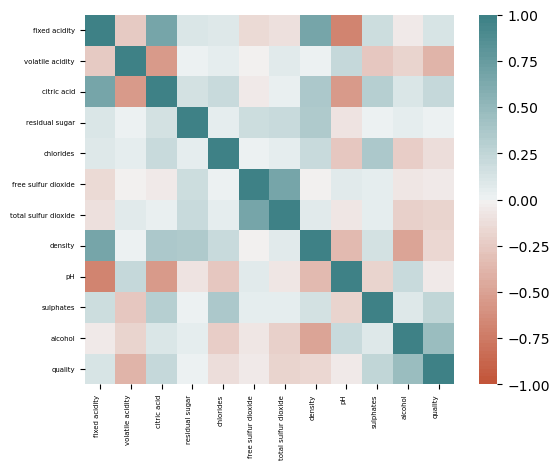

In [18]:
# plot a heat matrix
ax = sns.heatmap(corr_red_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=5,
    horizontalalignment='right'
  
);

In [19]:
corr_white_df = scaled_white_wine_df.corr()

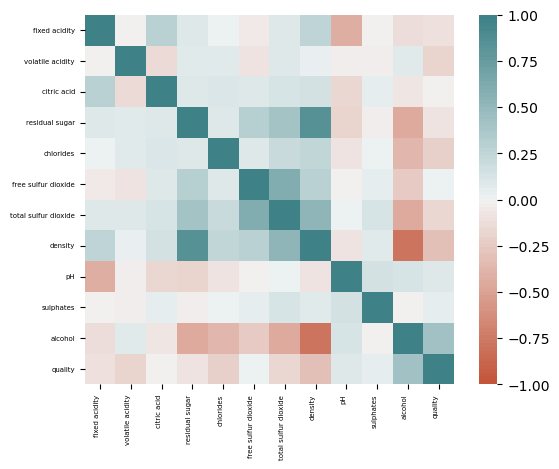

In [20]:
# plot a heat matrix
ax = sns.heatmap(corr_white_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=5,
    horizontalalignment='right'
  
);

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:

X = scaled_red_wine_df.drop('quality', axis=1)
y = scaled_red_wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [25]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error: 0.6237085535063345
Mean Squared Error: 0.5984178546083672
R-squared (R^2): 0.40318034127962166


#red wine quality: r^2 value with a value of 0.4032 suggest that there is a significant amount of unexplained variance with linear regression. maybe a different model?

### First Attempt:

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

input_features = len(X_train.columns)
hidden_nodes1=20
hidden_nodes2=10

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [28]:
# Train the model
fit_model = nn.fit(X_train,y_train, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 640us/step - loss: 0.3380 - accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 571us/step - loss: -0.0849 - accuracy: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 523us/step - loss: -0.5547 - accuracy: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 428us/step - loss: -1.1581 - accuracy: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 486us/step - loss: -2.0484 - accuracy: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 470us/step - loss: -3.3677 - accuracy: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 488us/step - loss: -5.3105 - accuracy: 0.0000e+00
Epoch 8/100
40/40 [==============================] - 0s 483us/step - loss: -8.0635 - accuracy: 0.0000e+00
Epoch 9/100
40/40 [==============================] - 0s 453us/step - loss: -11.7803 - accuracy: 0.0000e+00
Epoch 10/100
40/40 [==========================

40/40 [==============================] - 0s 465us/step - loss: -8031.0977 - accuracy: 0.0000e+00
Epoch 77/100
40/40 [==============================] - 0s 449us/step - loss: -8317.4580 - accuracy: 0.0000e+00
Epoch 78/100
40/40 [==============================] - 0s 469us/step - loss: -8593.9102 - accuracy: 0.0000e+00
Epoch 79/100
40/40 [==============================] - 0s 476us/step - loss: -8888.8672 - accuracy: 0.0000e+00
Epoch 80/100
40/40 [==============================] - 0s 444us/step - loss: -9182.5693 - accuracy: 0.0000e+00
Epoch 81/100
40/40 [==============================] - 0s 448us/step - loss: -9486.4795 - accuracy: 0.0000e+00
Epoch 82/100
40/40 [==============================] - 0s 449us/step - loss: -9793.5078 - accuracy: 0.0000e+00
Epoch 83/100
40/40 [==============================] - 0s 464us/step - loss: -10107.6709 - accuracy: 0.0000e+00
Epoch 84/100
40/40 [==============================] - 0s 459us/step - loss: -10424.6494 - accuracy: 0.0000e+00
Epoch 85/100
40/40 [=

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: -1.4799e+04 - accuracy: 0.0000e+00 - 51ms/epoch - 5ms/step
Loss: -14799.0, Accuracy: 0.0


### trying feature importance - Shipra

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = red_wine_df.drop('quality', axis=1)  # Features
y = red_wine_df['quality']  # Target variable


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Random Forest Regressor model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Accuracy Score : 0.705
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.78      0.83      0.80       185
           6       0.61      0.73      0.66       139
           7       0.81      0.47      0.60        55
           8       0.50      0.14      0.22         7

    accuracy                           0.70       400
   macro avg       0.45      0.36      0.38       400
weighted avg       0.69      0.70      0.69       400



In [31]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14143042160291305, 'alcohol'),
 (0.10925765152674909, 'sulphates'),
 (0.10758766504111869, 'volatile acidity'),
 (0.10136410994975813, 'total sulfur dioxide'),
 (0.09121532922359618, 'density'),
 (0.08180784658965519, 'chlorides'),
 (0.08012900033802366, 'pH'),
 (0.0749948489904873, 'citric acid'),
 (0.07465634639700147, 'fixed acidity'),
 (0.07159292768139083, 'residual sugar'),
 (0.06596385265930631, 'free sulfur dioxide')]

<Axes: title={'center': 'Features Importances in red wine'}, ylabel='1'>

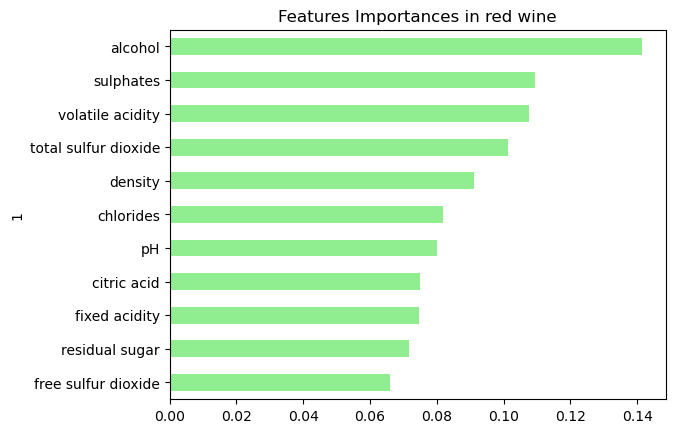

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances in red wine', legend=False)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = white_wine_df.drop('quality', axis=1)  # Features
y = white_wine_df['quality']  # Target variable


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Random Forest Regressor model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.6889795918367347
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.78      0.36      0.49        39
           5       0.68      0.68      0.68       347
           6       0.67      0.78      0.72       547
           7       0.74      0.62      0.68       231
           8       0.92      0.42      0.57        53
           9       0.00      0.00      0.00         3

    accuracy                           0.69      1225
   macro avg       0.54      0.41      0.45      1225
weighted avg       0.69      0.69      0.68      1225



In [34]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.11181557642399245, 'alcohol'),
 (0.10322172403647814, 'volatile acidity'),
 (0.102833035336588, 'density'),
 (0.0941547647332179, 'free sulfur dioxide'),
 (0.09274500070429076, 'total sulfur dioxide'),
 (0.08797040884976089, 'residual sugar'),
 (0.08657615946038073, 'pH'),
 (0.08554188796356897, 'chlorides'),
 (0.08013210583521788, 'sulphates'),
 (0.07981459372527477, 'citric acid'),
 (0.0751947429312296, 'fixed acidity')]

<Axes: title={'center': 'Features Importances in white wine'}, ylabel='1'>

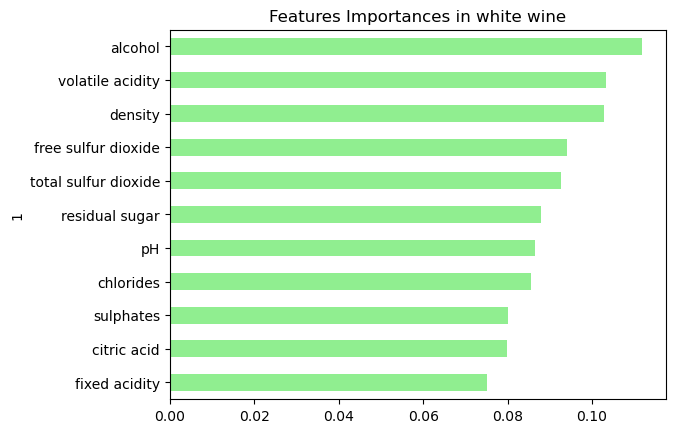

In [35]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances in white wine', legend=False)